<a href="https://colab.research.google.com/github/YashPatel1604/SpeechEmotionDetection/blob/main/SER_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import the necessary libraries
import pandas as pd
import numpy as np
import os #to deal with audio files 
import seaborn as sns
import matplotlib.pyplot as plt
import librosa #for audio libray files
import librosa.display
from IPython.display import Audio #to displaying audio

/usr/local/lib/python3.7/dist-packages/resampy/interpn.py:114: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  _resample_loop_p(x, t_out, interp_win, interp_delta, num_table, scale, y)


In [2]:
import zipfile
 
zip_file = "/content/archive (2) (1).zip"
 
try:
    with zipfile.ZipFile(zip_file) as z:
        z.extractall()
        print("Extracted all")
except:
    print("Invalid file")

Extracted all


In [4]:
path=[]
labels=[]
for dirname, _, filenames in os.walk('/content/dataset'):
    for filename in filenames:
        path.append(os.path.join(dirname, filename))
        label=filename.split('_')[-1]
        label=label.split('.')[0]
        labels.append(label.lower())
    if len(path) == 2800:
        break

In [6]:
data=pd.DataFrame()
data["PATH"]=path
data["EMOTION"]=labels
data.head()
data.info()
print(data.shape)
data["EMOTION"].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   PATH     2800 non-null   object
 1   EMOTION  2800 non-null   object
dtypes: object(2)
memory usage: 43.9+ KB
(2800, 2)


ps         400
angry      400
disgust    400
sad        400
neutral    400
happy      400
fear       400
Name: EMOTION, dtype: int64

In [7]:
data['EMOTION'].value_counts()

ps         400
angry      400
disgust    400
sad        400
neutral    400
happy      400
fear       400
Name: EMOTION, dtype: int64

In [8]:
def WaveForm(pname,sr,emotion):
    plt.figure(figsize=(10,2))
    plt.title(emotion)
    librosa.display.waveshow(pname,sr=sr)
    plt.show()

In [9]:
data.head()

,PATH,EMOTION
0,/content/dataset/YAF_pleasant_surprised/YAF_tu...,ps
1,/content/dataset/YAF_pleasant_surprised/YAF_li...,ps
2,/content/dataset/YAF_pleasant_surprised/YAF_mo...,ps
3,/content/dataset/YAF_pleasant_surprised/YAF_bo...,ps
4,/content/dataset/YAF_pleasant_surprised/YAF_re...,ps


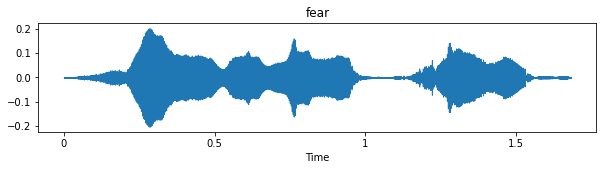

In [12]:
emotion="fear"
path=np.array(data["PATH"][data["EMOTION"]==emotion])[0]
pname,sample_rate=librosa.load(path)
WaveForm(pname,sample_rate, emotion)
print(" ")
Audio(path)

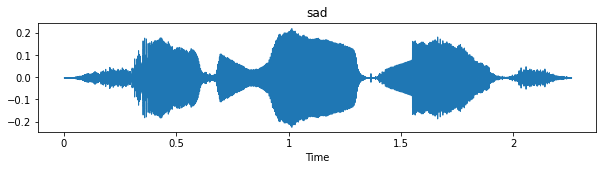

In [13]:
emotion="sad"
path=np.array(data["PATH"][data["EMOTION"]==emotion])[0]
pname,sample_rate=librosa.load(path)
WaveForm(pname,sample_rate, emotion)
print(" ")
Audio(path)


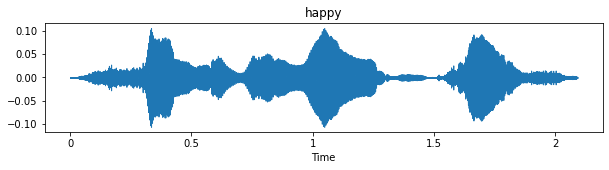

In [14]:
emotion="happy"
path=np.array(data["PATH"][data["EMOTION"]==emotion])[0]
pname,sample_rate=librosa.load(path)
WaveForm(pname,sample_rate, emotion)
print(" ")
Audio(path)

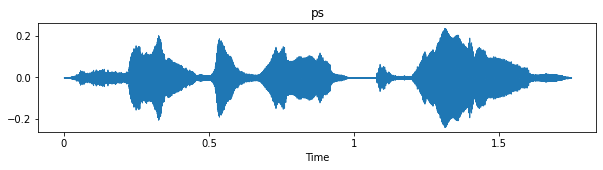

In [17]:
emotion="ps"
path=np.array(data["PATH"][data["EMOTION"]==emotion])[0]
pname,sample_rate=librosa.load(path)
WaveForm(pname,sample_rate, emotion)
print(" ")
Audio(path)

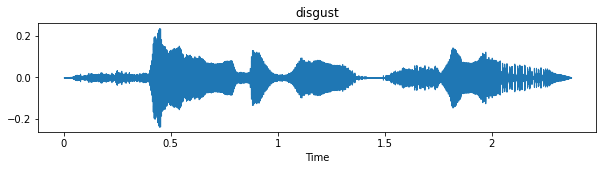

In [16]:
emotion="disgust"
path=np.array(data["PATH"][data["EMOTION"]==emotion])[0]
pname,sample_rate=librosa.load(path)
WaveForm(pname,sample_rate, emotion)
print(" ")
Audio(path)

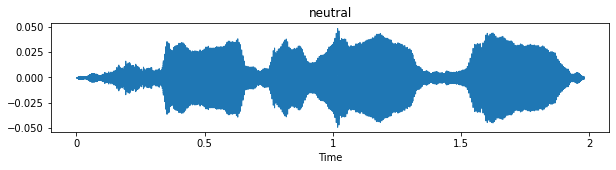

In [18]:
emotion="neutral"
path=np.array(data["PATH"][data["EMOTION"]==emotion])[0]
pname,sample_rate=librosa.load(path)
WaveForm(pname,sample_rate, emotion)
print(" ")
Audio(path)

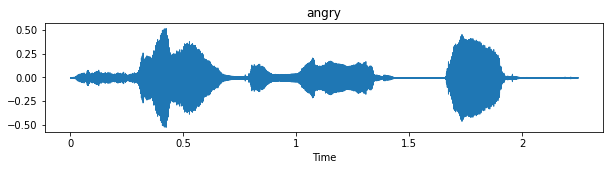

In [19]:
emotion="angry"
path=np.array(data["PATH"][data["EMOTION"]==emotion])[0]
pname,sample_rate=librosa.load(path)
WaveForm(pname,sample_rate, emotion)
print(" ")
Audio(path)

In [20]:
def extract_mfcc(filename):#Mel-Frequency Cepstral Coefficients
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [21]:
extract_mfcc(data["PATH"][0])

array([-3.4892102e+02,  8.2263626e+01, -2.8550491e+01, -8.3435545e+00,
       -1.1744405e+01,  3.4707575e+00, -1.2242301e+01, -3.7495003e+01,
        3.4691861e+00,  1.8976882e+00, -3.3596115e+01,  1.5081257e+01,
       -2.2658867e+01,  1.3240385e+01,  2.3181155e+00,  1.7604821e+00,
        6.6636209e+00,  7.5211468e+00, -4.9026036e+00,  6.2195992e+00,
       -4.9644589e+00,  1.3889506e+00, -9.4997416e+00,  1.5496642e-02,
       -3.8872819e+00,  2.7397189e+00,  4.9076378e-01,  8.1745310e+00,
        8.7864237e+00,  1.0910517e+01,  6.5581899e+00,  1.0628844e+01,
        4.2703514e+00,  8.8311300e+00,  5.2545748e+00,  6.2572451e+00,
        5.6963763e+00,  4.0192823e+00,  6.4160342e+00,  6.6865101e+00],
      dtype=float32)

In [22]:
X_mfcc = data["PATH"].apply(lambda x: extract_mfcc(x))
X_mfcc

0       [-348.92102, 82.263626, -28.550491, -8.3435545...
1       [-339.2906, 77.373886, -14.214683, -0.935724, ...
2       [-357.6771, 86.72367, -6.0981045, -8.907993, -...
3       [-392.46973, 82.36656, -19.97866, 0.85660493, ...
4       [-347.41495, 79.13375, -21.330893, 16.904806, ...
                              ...                        
2795    [-535.73254, 88.367645, 25.474012, 21.981142, ...
2796    [-543.2991, 113.685524, 33.24033, 10.191719, 1...
2797    [-514.6432, 81.677025, 31.042744, 12.618192, 9...
2798    [-575.597, 97.85567, 32.79474, 18.735569, 15.9...
2799    [-518.9116, 101.13236, 20.760616, 8.285277, 20...
Name: PATH, Length: 2800, dtype: object

In [23]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [24]:
# X = np.expand_dims(X, -1)
X.shape

(2800, 40)

In [25]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(data[["EMOTION"]])

In [26]:
y = y.toarray()
y.shape

(2800, 7)

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X,y, test_size=0.2, random_state=42)

In [28]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import models,layers
from tensorflow.keras import regularizers
from tensorflow.keras import Sequential

In [29]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 4

In [30]:
history = model.fit(X, y,  epochs=50)

Epoch 1/50
88/88 [==============================] - 13s 116ms/step - loss: 0.8871 - accuracy: 0.6557
Epoch 2/50
88/88 [==============================] - 10s 117ms/step - loss: 0.3116 - accuracy: 0.9000
Epoch 3/50
88/88 [==============================] - 10s 118ms/step - loss: 0.2643 - accuracy: 0.9196
Epoch 4/50
88/88 [==============================] - 10s 117ms/step - loss: 0.1764 - accuracy: 0.9479
Epoch 5/50
88/88 [==============================] - 11s 129ms/step - loss: 0.1305 - accuracy: 0.9604
Epoch 6/50
88/88 [==============================] - 10s 118ms/step - loss: 0.1087 - accuracy: 0.9636
Epoch 7/50
88/88 [==============================] - 10s 118ms/step - loss: 0.1087 - accuracy: 0.9654
Epoch 8/50
88/88 [==============================] - 10s 118ms/step - loss: 0.0902 - accuracy: 0.9700
Epoch 9/50
88/88 [==============================] - 10s 117ms/step - loss: 0.1785 - accuracy: 0.9464
Epoch 10/50
88/88 [==============================] - 10s 118ms/step - loss: 0.0884 - accura

In [31]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

18/18 [==============================] - 2s 61ms/step - loss: 9.0801e-04 - accuracy: 1.0000
